### Import the relevant libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


### Data generation

We generate data using the exact same logic and code as in the previos lab. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file.

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access!

In [25]:
observations = 500

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous lab.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-3, 1, (observations,1))

# Produce the targets according to our f(x,z) = 3*xs - 2*zs + 5 + noise.
# We are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 3*xs - 2*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [26]:
# The shape of the data we've prepared above.
input_size = 2
output_size = 1

### Outlining the model

In [27]:
# Here we define a basic TensorFlow object - the placeholder.
# In the TensorFlow, we feed the data to the model THROUGH the placeholders. 

inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

# As before, we define our weights and biases.
# They are the other basic TensorFlow object - a variable.
# We feed data into placeholders and they have a different value for each iteration

weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

# We get the outputs following our linear combination: y = xw + b
outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [28]:
# Again, we use a loss function. mean_squared_error is the scaled L2-norm (per observation)
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
# Note that there also exists a function tf.nn.l2_loss. 

# Instead of implementing Gradient Descent on our own, in TensorFlow we can simply state
# "Minimize the mean loss by using Adam with a given learning rate"
# Simple!
optimize = tf.train.AdamOptimizer(learning_rate=0.09).minimize(mean_loss)

### Prepare for execution

In [31]:
# So far we've defined the placeholders, variables, the loss function and the optimization method.
# The actual training happens inside sessions.
sess = tf.InteractiveSession()

C:\Users\SUN RISE\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### Initializing variables

In [34]:
# Before we start training, we need to initialize our variables: the weights and biases.
initializer = tf.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [35]:
#load the training data we created above.
training_data = np.load('TF_intro.npz')

### Learning

In [36]:
# As in the previous lab, we train for a set number (100) of iterations over the dataset
for i in range(50):
    # sess.run is the session's function to actually do something, anything.
    # Above, we used it to initialize the variables.
    # Here, we use it to feed the training data to the computational graph, defined by the feed_dict parameter
    # So the line of code means: "Run the optimize and mean_loss operations by filling the placeholder
    # objects with data from the feed_dict parameter".
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

194.50928
181.15617
168.31653
155.99854
144.20924
132.95436
122.23825
112.06362
102.43158
93.34141
84.79054
76.77439
69.286385
62.31783
55.857967
49.89393
44.410843
39.391827
34.818214
30.669655
26.924324
23.559187
20.550259
17.87289
15.502105
13.412893
11.580538
9.980918
8.59077
7.3879337
6.351537
5.4621477
4.701878
4.0544267
3.505095
3.0407534
2.649773
2.3219428
2.0483506
1.8212669
1.6340084
1.4808145
1.3567158
1.2574245
1.1792177
1.118852
1.073475
1.0405636
1.0178672
1.0033642


### Plotting the data

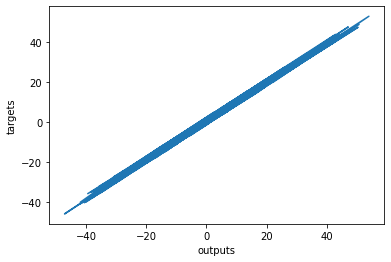

In [37]:
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()